<a href="https://colab.research.google.com/github/WilliamShengYangHuang/RC18_Machine_Learning/blob/main/Image_Processing_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing Basics**

for MArch Urban Design RC18, Bartlett School of Architecture, UCL

Coursse Tutor: William Huang (ucfnhua@ucl.ac.uk)

Last modified in January 2023

## 1. Import Packages

In [90]:
import numpy as np

import cv2 as cv
from google.colab.patches import cv2_imshow # cv.imshow()

from scipy import ndimage as ndi
from skimage.io import imread
from skimage.io import imshow
from skimage import data
from skimage.exposure import histogram
from skimage.color import rgb2grey
from skimage.filters import gaussian

import matplotlib.pyplot as plt

from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Read Images

<ipython-input-5-2520d06d8c36>:3: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  img2 = rgb2grey(imread(PATH))


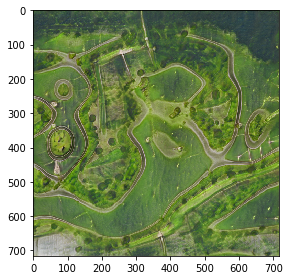

In [5]:
PATH = '/content/drive/My Drive/test.png' #@param{type:"string"}
img = imread(PATH)
img2 = rgb2grey(imread(PATH))
w, d = img2.shape
imshow(img)

#### Load Image Batch 

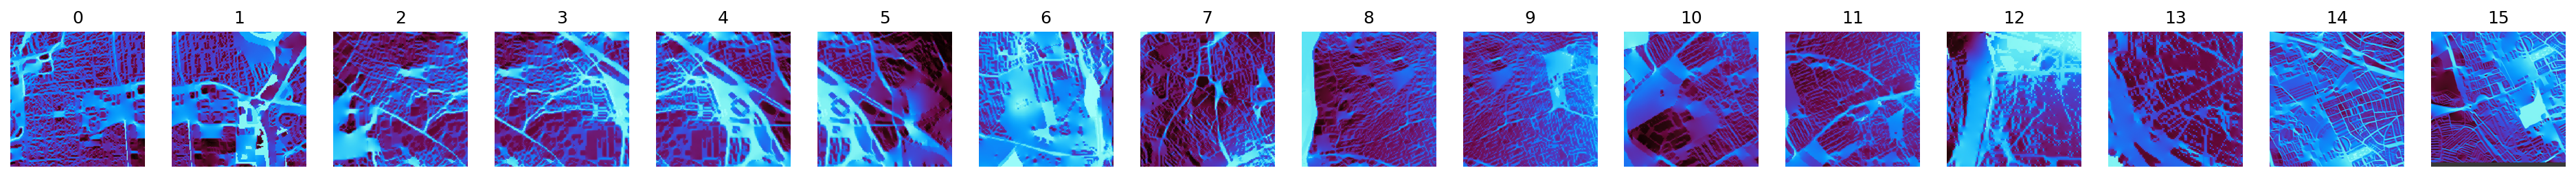

In [6]:
PATH = "/content/drive/My Drive/connectivity_w"

from glob import glob
images = [cv.imread(file, cv.COLOR_BGR2RGB) for file in glob(PATH + '/*.jpg')]

num_of_data = 16

plt.figure(figsize = (32, 2), dpi=150)

for i in range(16):  
    plt.subplot(1, num_of_data, i+1)
    plt.title(i)
    plt.axis('off')  
    plt.imshow(images[i])

## 3. Scale Images

Matrices for affine transformation operations:

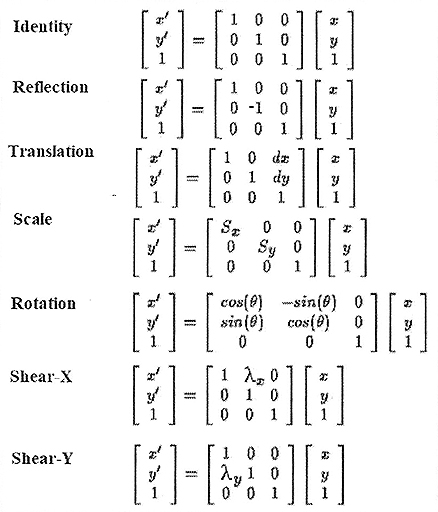

#### Method 1: based on numpy array

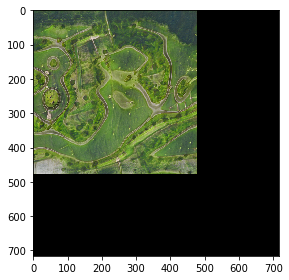

In [7]:
scale_x = 1.5 #@param{type:"slider", min:0, max:4, step:0.25} 
scale_y = 1.5 #@param{type:"slider", min:0, max:4, step:0.25} 
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img, img_scale)
# plt.axis('off')
imshow(img_scaled)

#### Method 2: based on opencv

`cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]])`

In [8]:
print(img.shape) # check image shape

(716, 716, 3)


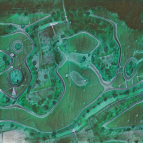

(143, 143, 3)


In [157]:
# percent of original size
scale_percent = 20 #@param{type:"slider", min:1, max:100, step:0.5} 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

im_resized = cv.resize(img, dim, interpolation = cv.INTER_AREA)

cv2_imshow(im_resized)
print(im_resized.shape) # chack image shape

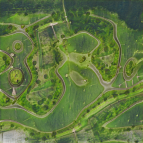

In [158]:
im_resized_rgb = cv.cvtColor(im_resized, cv.COLOR_BGR2RGB)
cv2_imshow(im_resized_rgb)

Compare `cv2_imshow()` with `plt.imshow()`

## 4. Subplots

`matplotlib.pyplot.subplot(nrows, ncols, index, **kwargs)`

`matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)`

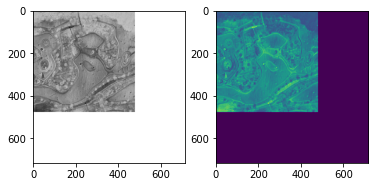

In [11]:
img_scale = np.array([[scale_x, 0 ,0], [0, scale_y, 0], [0, 0, 1]])
img_scaled = ndi.affine_transform(img2, img_scale)

fig, (ax, ax2) = plt.subplots(1, 2) 
ax.imshow(img_scaled, cmap='binary')
ax2.imshow(img_scaled, cmap='viridis')

## 5. Crop Images

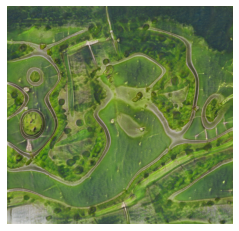

In [201]:
image = cv.imread("/content/drive/My Drive/test.png")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
width = 514 #@param {type:'slider', min:0, max:2048, step: 2}
height = 496 #@param {type:'slider', min:0, max:2048, step: 2}
image = cv.resize(image, (width, height))
axis = 'off' #@param ['on', 'off'] {type:'string'}
plt.axis(axis)
plt.imshow(image)

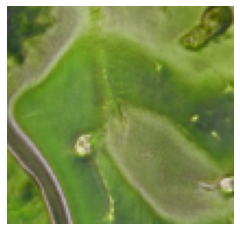

In [202]:
import tensorflow as tf

central_fraction = 0.2 #@param {type:'slider', min:0, max:1, step:0.1}
img_cropped = tf.image.central_crop(image, central_fraction)
axis = 'off' #@param ['on', 'off'] {type:'string'}
plt.axis(axis)
plt.imshow(img_cropped)

## 6. Rotate Images

`cv2.getRotationMatrix2D(centre, angle, scale)`

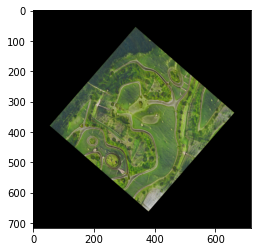

In [215]:
# Get image dimensions
rows, cols = img.shape[:2]

# Specify the angle of rotation
angle = 49 #@param {type:'slider', min:-179, max:179, step:1}

M = cv.getRotationMatrix2D((cols/2,rows/2), angle, scale=0.6) # Get the rotation matrix

image_roatated = cv.warpAffine(img, M, (cols, rows)) # Perform the rotation

plt.imshow(image_roatated)

In [ ]:

# Save the rotated image
cv.imwrite("rotated_image.jpg", dst)

## 7. Plot Histogram

`plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)`

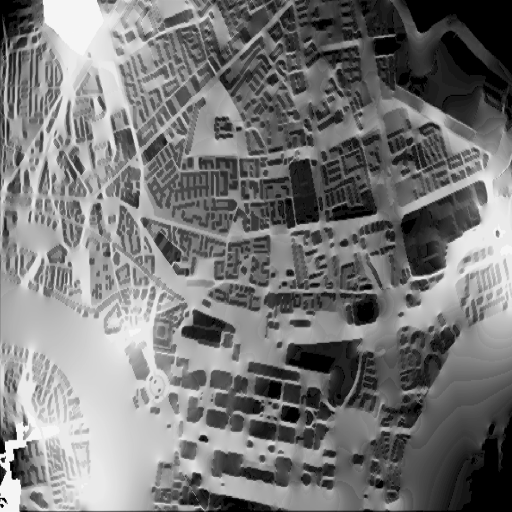

In [12]:
# Read image as grayscale image 
path = "/content/drive/My Drive/site_connectivity.png"

im = cv.imread(path,cv.IMREAD_GRAYSCALE)
im_resized = cv.resize(im, dsize=(512, 512))
cv2_imshow(im_resized)

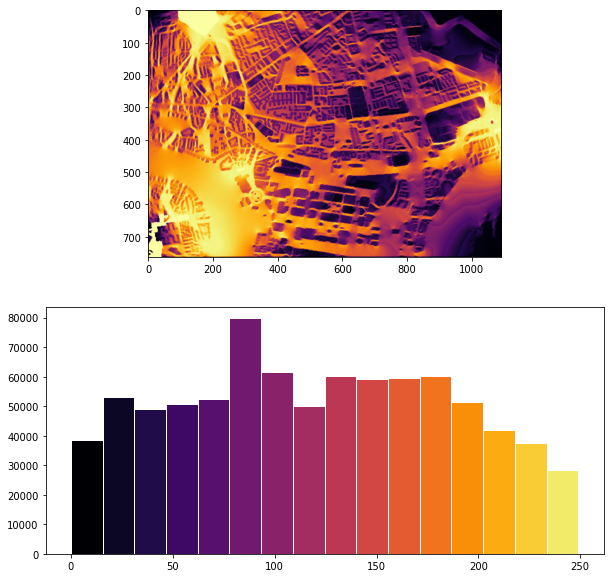

In [221]:
plt.figure(figsize=(10, 10)) # set figure size 

# top subplot 
plt.subplot(211) 
im2 = plt.imread(path)
plt.imshow(im2)

# bottom subplot 
plt.subplot(212)
num_of_bins = 16 #@param {type:'slider', min:0, max:512, step:1}

vals = im.flatten() # flatten a multi-dimensional numpy array into a one-dimensional arra

b, bins, patches = plt.hist(vals, num_of_bins, edgecolor='white') # plot histogram 

"""
'b': This is a numpy array or a list of the values that define the bin edges of 
the histogram. The number of bins will be determined by the number of elements 
in this array minus one.

'bins': This is an optional parameter that sets the number of bins in the 
histogram. When b is not provided, this parameter is used to determine the 
number of bins.

'patches': This is an output parameter that returns a list of patch objects that 
represent the bars in the histogram. These patch objects can be further modified
 to change the appearance of the histogram.
"""

cm = plt.get_cmap('inferno') # set colour map
for i in range(len(patches)):
    color = cm(1.*i/len(patches))  
    patches[i].set_facecolor(color)


## 8. Canny Edge Detection

`cv.Canny(image, threshold1, threshold2)`

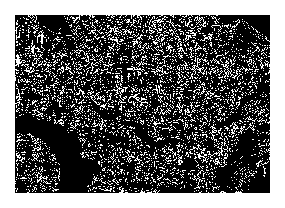

In [198]:
import cv2 as cv
threshold_1 = 19 #@param{type:"slider", min:0, max:255, step:1}
threshold_2 = 18 #@param{type:"slider", min:0, max:255, step:1}

edges = cv.Canny(im, threshold_1, threshold_2)

plt.figure(figsize=(2, 4), dpi=150)
plt.axis('off')
imshow(edges)

### Batch Canny Processing

In [84]:
def Can_gradient(im, num_degrees, index):

    threshold_1 = index*(256/num_degrees) 
    threshold_2 = index*(256/num_degrees) 

    print(threshold_1, threshold_2)
   
    edges = cv.Canny(im, threshold_1, threshold_2)

    plt.figure(figsize=(1, 10), dpi=150)
    plt.subplot(1, num_degrees, index+1)
    #plt.title(str(threshold_1) + ', ' + str(threshold_2), fontsize = 5)
    plt.axis('off')    
    imshow(edges)

0.0 0.0
16.0 16.0
32.0 32.0
48.0 48.0
64.0 64.0
80.0 80.0
96.0 96.0
112.0 112.0
128.0 128.0
144.0 144.0
160.0 160.0
176.0 176.0
192.0 192.0
208.0 208.0
224.0 224.0
240.0 240.0


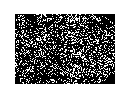

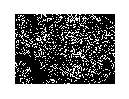

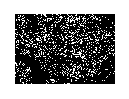

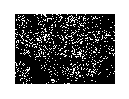

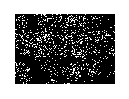

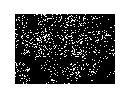

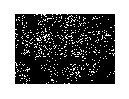

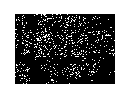

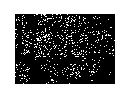

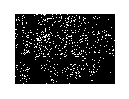

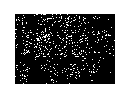

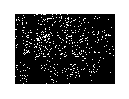

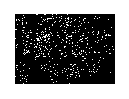

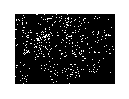

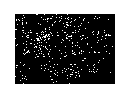

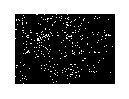

In [83]:
for i in range(len(images)):    
    Can_gradient(im, 16, i)

In [78]:
def Can_series(im_list, order):

    threshold_1 = order*(256/len(im_list)) 
    threshold_2 = order*(256/len(im_list)) 

    print(threshold_1, threshold_2)
   
    edges = cv.Canny(im_list[order], threshold_1, threshold_2)

    plt.figure(figsize=(1, 10), dpi=150)
    plt.subplot(1, len(im_list), order+1)
    plt.title(str(threshold_1) + ', ' + str(threshold_2), fontsize=5)
    plt.axis('off')    
    imshow(edges)

0.0 0.0
16.0 16.0
32.0 32.0
48.0 48.0
64.0 64.0
80.0 80.0
96.0 96.0
112.0 112.0
128.0 128.0
144.0 144.0
160.0 160.0
176.0 176.0
192.0 192.0
208.0 208.0
224.0 224.0
240.0 240.0


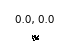

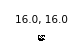

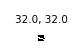

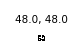

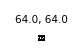

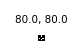

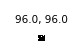

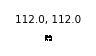

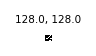

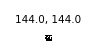

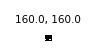

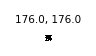

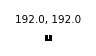

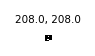

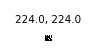

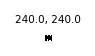

In [79]:
for i in range(len(images)):    
    Can_series(images, i)

## 9. Coversion between Image, Array and Data Frame

### To Numpy Array

In [100]:
import pandas as pd

In [145]:
IMG = np.array(im_resized)
IMG

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [246, 245, 245, ...,   0,   0,   0],
       [246, 245, 245, ...,   0,   0,   0],
       [246, 246, 246, ...,   0,   0,   0]], dtype=uint8)

### From Numpy Array to List

In [146]:
IMG_f = IMG.flatten()
IMG_f
# print((IMG_f).shape)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

### To Pandas Data Frame

In [147]:
df_IMG = pd.DataFrame(IMG_f)
df_IMG

0
0       0
1       0
2       0
3       0
4       0
...    ..
262139  0
262140  0
262141  0
262142  0
262143  0

[262144 rows x 1 columns]

However, this dimensionality does not fulfill our demands: We want an image as a row rather than a column.

### Flip Matrix

In [148]:
IMG_f_r = IMG_f.reshape(1, -1)
IMG_f_r

array([[0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [149]:
df_IMG_2 = pd.DataFrame(IMG_f_r)
df_IMG_2

0       1       2       3       4       5       6       7       8       \
0       0       0       0       0       0       0       0       0       0   

   9       ...  262134  262135  262136  262137  262138  262139  262140  \
0       0  ...       0       0       0       0       0       0       0   

   262141  262142  262143  
0       0       0       0  

[1 rows x 262144 columns]

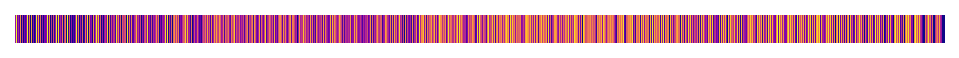

In [150]:
plt.figure(figsize=(8, 0.25), dpi=150)

pos_x = []
for i in range(0, len(IMG_f)):
  pos_x.append(i)

pos_y = [0]* len(IMG_f)

plt.scatter(pos_x, pos_y, marker='|', c=IMG_f_r) 
plt.pcolormesh(IMG_f_r, cmap='plasma')
plt.axis('off')

SAVING_PATH = "/content/drive/My Drive" #@param{type:"string"}
plt.savefig(SAVING_PATH + '/strip.png', dpi=150) # must to be placed before plt.show()

plt.show()

In [151]:
RE = np.array_split(IMG_f, 512) # split the list into 512 sub-lists
print(RE)

[array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  21,  21,  26,  20,  28,  28,  23,  21,  28,  31,  38,
        34,  22,  21,  23,  25,  56,  57,  61,  59,  68,  73,  81,  82,
        90,  98, 102, 135, 245, 245, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245,
       245, 245, 245, 245, 245, 245, 117, 115, 112, 104,  77, 105,  97,
        93,  95, 116, 121,  86,  81,  79,  86,  81,  88,  82,  84, 126,
       180, 187, 196, 186, 193, 207, 199, 216, 221, 222, 219, 219, 219,
       204, 204, 173, 180, 164, 148, 127, 148, 187, 163, 190, 190, 187,
       198, 150, 143, 135, 131, 157, 122, 105, 149, 150, 160, 166, 171,
       184, 191, 181, 177, 177, 177, 179, 179, 181, 181, 181, 181, 182,
       182, 183, 183, 185, 185, 185, 185, 187, 187, 187, 187, 1

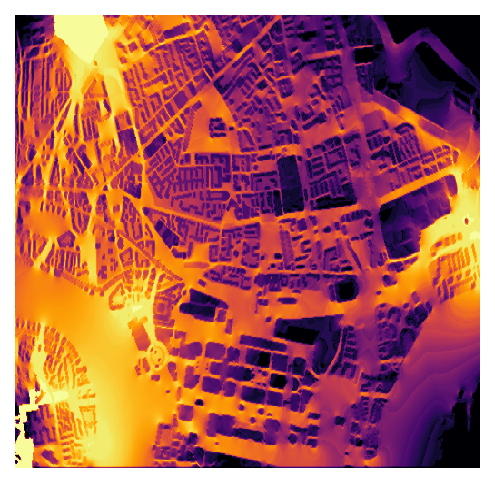

In [154]:
import seaborn as sns
plt.figure(figsize=(4, 4), dpi=150)
plt.axis('off')
sns.heatmap(RE, cmap='inferno', cbar=False, annot=False)